In [17]:
import jax, jax.nn
from jax import random
import jax.numpy as jnp
from jax.experimental import optimizers
from jax.ops import index, index_add, index_update

import sys, os
sys.path.append("../../")
	
from Seismic_wave_inversion_PINN.data_utils import *
from Seismic_wave_inversion_PINN.jax_model import *

from collections import namedtuple
# from jax.config import config; config.update("jax_enable_x64", True)
# dtype = jnp.float64
dtype = jnp.float32

import matplotlib.pyplot as plt
%matplotlib notebook

# Example1, Paper 1

$$
h_0(x) = e^{-25(x-0.5)^2}\exp\left(-\frac{i}{5\epsilon}\ln\left(e^{5(x-0.5)}+e^{-5(x-0.5)}\right)\right), \ x\in [0, 1].
$$

<IPython.core.display.Javascript object>


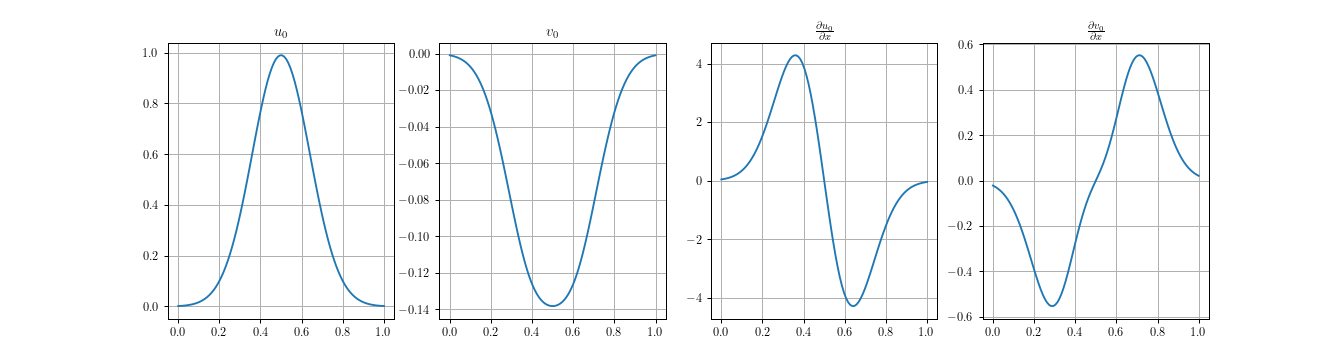

In [20]:
epsilon = 1.0
u0_fn = lambda x: jnp.exp(-25*(x-0.5)**2)*jnp.cos(-1/(5*epsilon)*jnp.log(jnp.exp(5*(x-0.5))+jnp.exp(-5*(x-0.5))))
v0_fn = lambda x: jnp.exp(-25*(x-0.5)**2)*jnp.sin(-1/(5*epsilon)*jnp.log(jnp.exp(5*(x-0.5))+jnp.exp(-5*(x-0.5))))
du0_dx_fn = lambda x: jax.vmap(jax.jacfwd(u0_fn), 0)(x)[:, 0:1, 0]
dv0_dx_fn = lambda x: jax.vmap(jax.jacfwd(v0_fn), 0)(x)[:, 0:1, 0]
domain = [0, 1]

x = jnp.linspace(*domain, 100).reshape((-1, 1))
u0 = u0_fn(x)
v0 = v0_fn(x)
du0_dx = du0_dx_fn(x)
dv0_dx = dv0_dx_fn(x)

plt.rcParams["text.usetex"] = True
f, ax = plt.subplots(1, 4, figsize = (15, 4))
ax[0].plot(x, u0)
ax[0].set_title(r"$u_0$")
ax[1].plot(x, v0)
ax[1].set_title(r"$v_0$")
ax[2].plot(x, du0_dx)
ax[2].set_title(r"$\frac{\partial u_0}{\partial x}$")
ax[3].plot(x, dv0_dx)
ax[3].set_title(r"$\frac{\partial v_0}{\partial x}$")

for i in range(4):
	ax[i].grid()
plt.show()

# Example1, Paper 2

$$
h_0(x) = e^{-25x^2}\exp\left(-\frac{i}{5\epsilon}\cosh(5x)\right), \ x\in [-0.25, 0.25].
$$

<IPython.core.display.Javascript object>


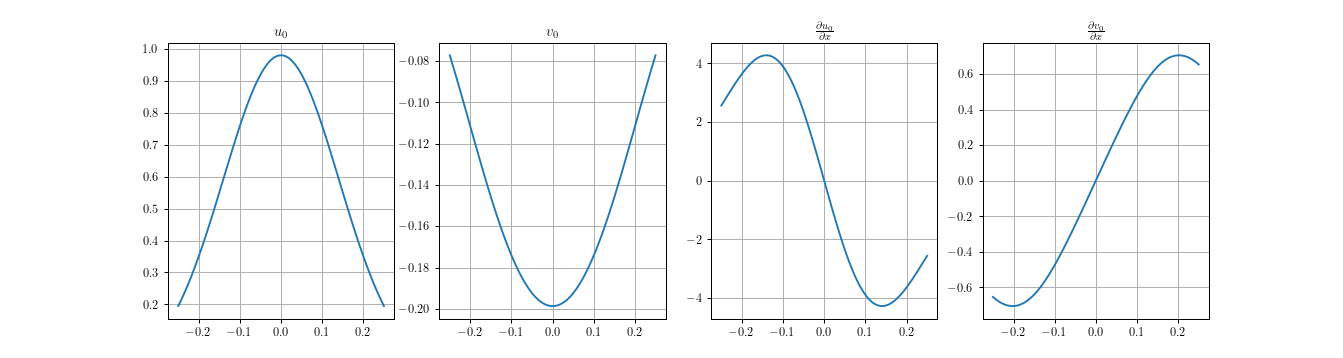

In [21]:
epsilon = 1.0
u0_fn = lambda x: jnp.exp(-25*x**2)*jnp.cos(-1/(5*epsilon)*jnp.cosh(5*x))
v0_fn = lambda x: jnp.exp(-25*x**2)*jnp.sin(-1/(5*epsilon)*jnp.cosh(5*x))
du0_dx_fn = lambda x: jax.vmap(jax.jacfwd(u0_fn), 0)(x)[:, 0:1, 0]
dv0_dx_fn = lambda x: jax.vmap(jax.jacfwd(v0_fn), 0)(x)[:, 0:1, 0]
domain = [-0.25, 0.25]

x = jnp.linspace(*domain, 100).reshape((-1, 1))
u0 = u0_fn(x)
v0 = v0_fn(x)
du0_dx = du0_dx_fn(x)
dv0_dx = dv0_dx_fn(x)

plt.rcParams["text.usetex"] = True
f, ax = plt.subplots(1, 4, figsize = (15, 4))
ax[0].plot(x, u0)
ax[0].set_title(r"$u_0$")
ax[1].plot(x, v0)
ax[1].set_title(r"$v_0$")
ax[2].plot(x, du0_dx)
ax[2].set_title(r"$\frac{\partial u_0}{\partial x}$")
ax[3].plot(x, dv0_dx)
ax[3].set_title(r"$\frac{\partial v_0}{\partial x}$")

for i in range(4):
	ax[i].grid()
plt.show()

# Example1, Paper 2, Extended domain

$$
h_0(x) = e^{-25x^2}\exp\left(-\frac{i}{5\epsilon}\cosh(5x)\right), \ x\in [-1, 1].
$$

<IPython.core.display.Javascript object>


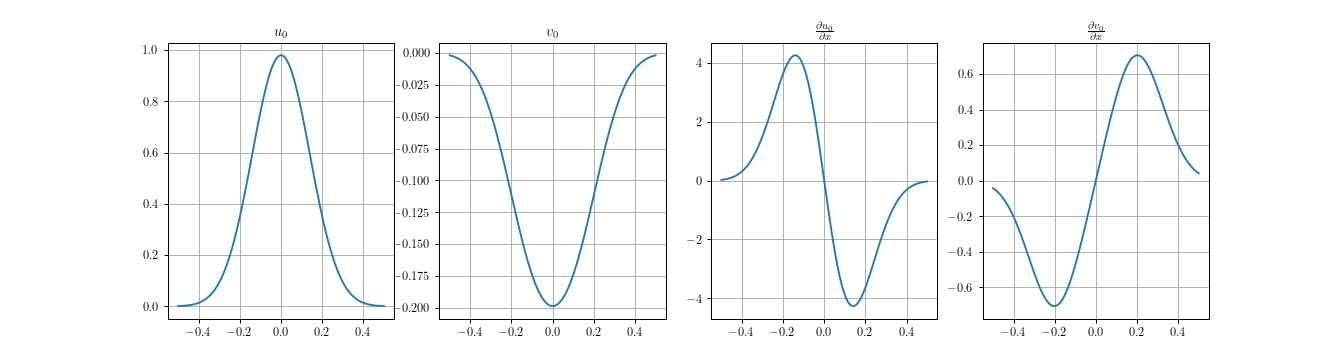

In [24]:
epsilon = 1.0
u0_fn = lambda x: jnp.exp(-25*x**2)*jnp.cos(-1/(5*epsilon)*jnp.cosh(5*x))
v0_fn = lambda x: jnp.exp(-25*x**2)*jnp.sin(-1/(5*epsilon)*jnp.cosh(5*x))
du0_dx_fn = lambda x: jax.vmap(jax.jacfwd(u0_fn), 0)(x)[:, 0:1, 0]
dv0_dx_fn = lambda x: jax.vmap(jax.jacfwd(v0_fn), 0)(x)[:, 0:1, 0]
domain = [-0.5, 0.5]

x = jnp.linspace(*domain, 100).reshape((-1, 1))
u0 = u0_fn(x)
v0 = v0_fn(x)
du0_dx = du0_dx_fn(x)
dv0_dx = dv0_dx_fn(x)

plt.rcParams["text.usetex"] = True
f, ax = plt.subplots(1, 4, figsize = (15, 4))
ax[0].plot(x, u0)
ax[0].set_title(r"$u_0$")
ax[1].plot(x, v0)
ax[1].set_title(r"$v_0$")
ax[2].plot(x, du0_dx)
ax[2].set_title(r"$\frac{\partial u_0}{\partial x}$")
ax[3].plot(x, dv0_dx)
ax[3].set_title(r"$\frac{\partial v_0}{\partial x}$")

for i in range(4):
	ax[i].grid()
plt.show()